In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the database. Store it in a variables.

In [3]:
raw_applications = pd.read_csv('./application_data.csv') # Write your code for importing the csv file here
previous_applications = pd.read_csv('./previous_application.csv') # Write your code for importing the csv file here

-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [4]:
raw_applications.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Code for inspection
raw_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [6]:
# Write your code for column-wise null percentages here
round(raw_applications.isnull().sum() * 100 / len(raw_applications), 2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

-  ### Subtask 2.2: Drop unnecessary columns

In [7]:
redundant_columns = ['CNT_FAM_MEMBERS', 
                     'DAYS_LAST_PHONE_CHANGE', 
                     'FLAG_DOCUMENT_2', 
                     'FLAG_DOCUMENT_3',
                     'FLAG_DOCUMENT_4', 
                     'FLAG_DOCUMENT_5', 
                     'FLAG_DOCUMENT_6', 
                     'FLAG_DOCUMENT_7', 
                     'FLAG_DOCUMENT_8', 
                     'FLAG_DOCUMENT_9',
                     'FLAG_DOCUMENT_10', 
                     'FLAG_DOCUMENT_11', 
                     'FLAG_DOCUMENT_12', 
                     'FLAG_DOCUMENT_13', 
                     'FLAG_DOCUMENT_14', 
                     'FLAG_DOCUMENT_15',
                     'FLAG_DOCUMENT_16', 
                     'FLAG_DOCUMENT_17', 
                     'FLAG_DOCUMENT_18', 
                     'FLAG_DOCUMENT_19', 
                     'FLAG_DOCUMENT_20', 
                     'FLAG_DOCUMENT_21', 
                     'FLAG_MOBIL', 
                     'FLAG_EMP_PHONE', 
                     'FLAG_WORK_PHONE', 
                     'FLAG_CONT_MOBILE', 
                     'FLAG_PHONE', 
                     'FLAG_EMAIL', 
                     'REGION_RATING_CLIENT', 
                     'REGION_RATING_CLIENT_W_CITY', 
                     'OWN_CAR_AGE', 
                     'EXT_SOURCE_1', 
                     'EXT_SOURCE_2', 
                     'EXT_SOURCE_3', 
                     'AMT_REQ_CREDIT_BUREAU_HOUR', 
                     'AMT_REQ_CREDIT_BUREAU_DAY', 
                     'AMT_REQ_CREDIT_BUREAU_WEEK', 
                     'AMT_REQ_CREDIT_BUREAU_MON', 
                     'AMT_REQ_CREDIT_BUREAU_QRT', 
                     'AMT_REQ_CREDIT_BUREAU_YEAR', 
                     'OBS_30_CNT_SOCIAL_CIRCLE', 
                     'DEF_30_CNT_SOCIAL_CIRCLE', 
                     'OBS_60_CNT_SOCIAL_CIRCLE', 
                     'DEF_60_CNT_SOCIAL_CIRCLE',
                     'TOTALAREA_MODE',
                     'HOUSETYPE_MODE',
                     'FONDKAPREMONT_MODE',
                     'NONLIVINGAREA_MEDI',
                     'LIVINGAREA_MEDI',
                     'NONLIVINGAPARTMENTS_MEDI',
                     'ELEVATORS_MODE',
                     'COMMONAREA_AVG'
                    ]
applications = raw_applications.drop(columns=redundant_columns,axis=1)

In [8]:
# Removing columns with 30% or more Null Values
emptycol=applications.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
emptycol = list(emptycol[emptycol.values>=0.3].index)
applications.drop(labels=emptycol,axis=1,inplace=True)
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED            

-  ### Subtask 2.3: Drop unecessary rows

In [9]:
# Drop unecessary rows using columns with 30% or more Null percentages
emptyrow=raw_applications.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(raw_applications)].index)
raw_applications.drop(labels=emptyrow,axis=0,inplace=True)

In [10]:
# Re-check the percentage of Null values for eaach Columns
applications.isnull().sum()/len(applications)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000


-  ### Subtask 2.4: Fill NaN values

In [11]:
# Filling missing values with median
values=applications['AMT_ANNUITY'].median()
applications.loc[applications['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [12]:
# Describing the Gender column to check the number of females and males
applications['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [13]:
# Updating the column 'CODE_GENDER' with "F" for the dataset
applications.loc[applications['CODE_GENDER']=='XNA','CODE_GENDER']='F'
applications['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [14]:
# Describing the organization type column
applications['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [15]:
applications=applications.drop(applications.loc[applications['ORGANIZATION_TYPE']=='XNA'].index)
applications[applications['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [16]:
# Write your code for checking number of retained rows here
retained_rows_count = applications.shape[0]
percentage_of_retained_rows = round((applications.shape[0] / raw_applications.shape[0]) * 100, 2)

display("No.Of retained rows: {0}".format(retained_rows_count))
display("Percentage Of retained rows: {0}".format(percentage_of_retained_rows))

'No.Of retained rows: 252137'

'Percentage Of retained rows: 81.99'

In [17]:
# Inspect the dataframe
applications.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 28 columns):
SK_ID_CURR                     252137 non-null int64
TARGET                         252137 non-null int64
NAME_CONTRACT_TYPE             252137 non-null object
CODE_GENDER                    252137 non-null object
FLAG_OWN_CAR                   252137 non-null object
FLAG_OWN_REALTY                252137 non-null object
CNT_CHILDREN                   252137 non-null int64
AMT_INCOME_TOTAL               252137 non-null float64
AMT_CREDIT                     252137 non-null float64
AMT_ANNUITY                    252137 non-null float64
NAME_INCOME_TYPE               252137 non-null object
NAME_EDUCATION_TYPE            252137 non-null object
NAME_FAMILY_STATUS             252137 non-null object
NAME_HOUSING_TYPE              252137 non-null object
REGION_POPULATION_RELATIVE     252137 non-null float64
DAYS_BIRTH                     252137 non-null int64
DAYS_EMPLOYED            

## Outlier Analyze and Treatment

In [18]:
def outlierAnalyze(column):
    
    # Treat Outliers
    Q1 = applications[column].quantile(0.25)
    Q3 = applications[column].quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)
    
    COULMN_OUTLIERS = applications[(applications[column] < (Q1 - 1.5 * IQR)) |(applications[column] > (Q3 + 1.5 * IQR))]
    applications.drop(COULMN_OUTLIERS.index , inplace=True)

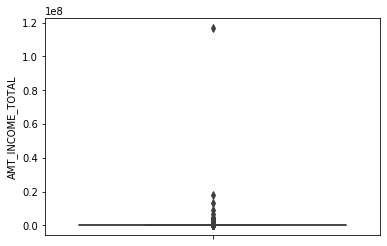

In [19]:
# AMT_INCOME_TOTAL Outlier analyze and treatment
sns.boxplot(y=applications['AMT_INCOME_TOTAL'])

In [20]:
outlierAnalyze('AMT_INCOME_TOTAL')

99000.0


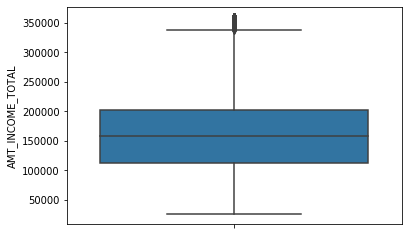

In [21]:
sns.boxplot(y=applications['AMT_INCOME_TOTAL'])

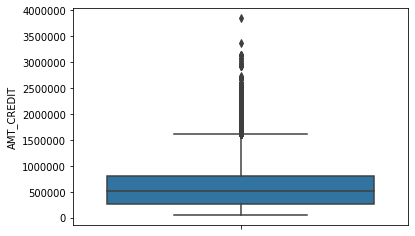

In [22]:
# AMT_CREDIT Outlier analyze and treatment
sns.boxplot(y=applications['AMT_CREDIT'])

In [23]:
outlierAnalyze('AMT_CREDIT')

537583.5


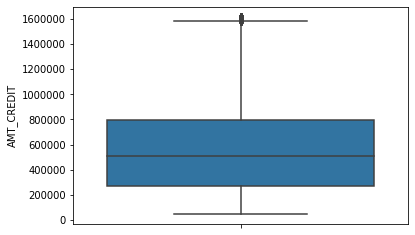

In [24]:
sns.boxplot(y=applications['AMT_CREDIT'])

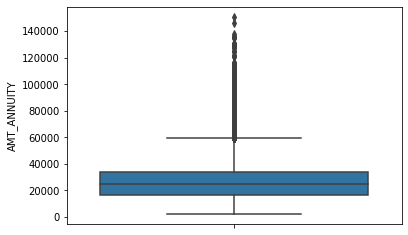

In [25]:
# AMT_ANNUITY Outlier analyze and treatment
sns.boxplot(y=applications['AMT_ANNUITY'])

In [26]:
outlierAnalyze('AMT_ANNUITY')

17163.0


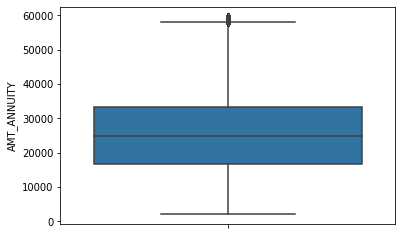

In [27]:
sns.boxplot(y=applications['AMT_ANNUITY'])

### Binning of continuous variables

In [28]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

applications['AMT_INCOME_RANGE']=pd.cut(applications['AMT_INCOME_TOTAL'],bins,labels=slot)

In [29]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

applications['AMT_CREDIT_RANGE']=pd.cut(applications['AMT_CREDIT'],bins=bins,labels=slots)

In [30]:
# View the dataset
applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,11,0,0,0,0,0,0,School,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,9,0,0,0,0,0,0,Government,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,17,0,0,0,0,0,0,Business Entity Type 3,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,11,0,0,0,0,1,1,Religion,100000-125000,500000-550000


## Task 3: Data Analysis

In [31]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0=applications.loc[applications["TARGET"]==0]
target1=applications.loc[applications["TARGET"]==1]

In [32]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0)/len(target1),2)

10.23

The Imbalance ratio is 10.23

**Univariate analysis for categories**

**Now, doing Categorical Univariate Analysis in logarithmic scale for target=0 and target=1(client with no payment difficulties)**

In [33]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 6)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

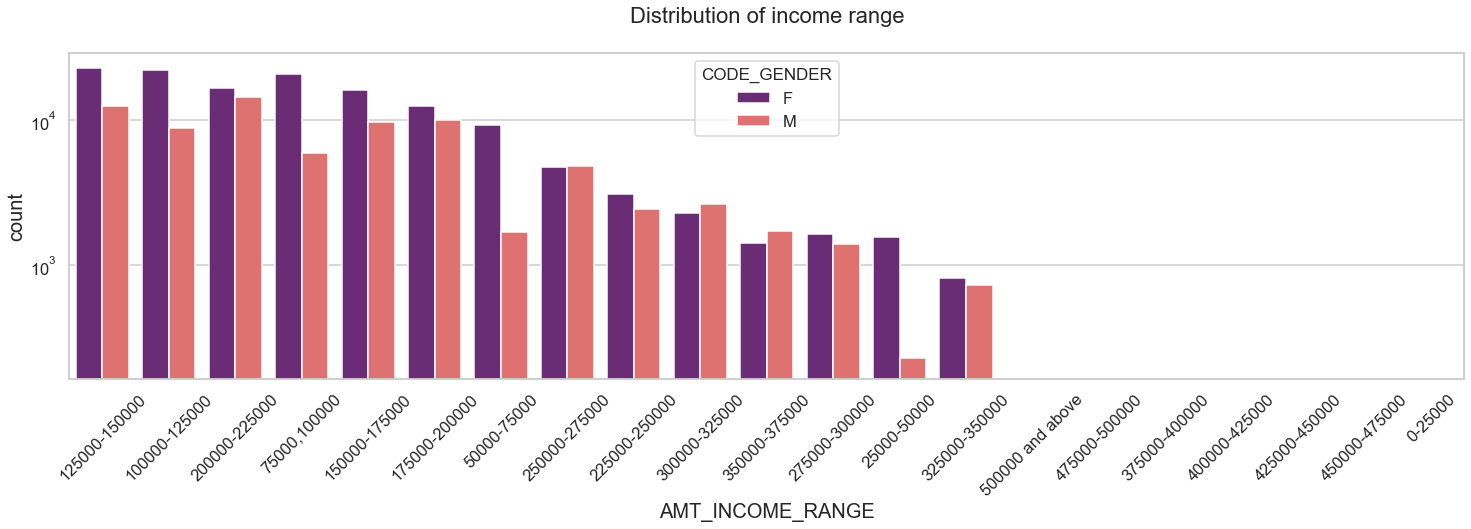

In [34]:
# PLotting for income range -- Target 0

uniplot(target0,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. Female counts are higher than male.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that females are more than male in having credits for that range.
4. Very less count for income range 500000 and above.

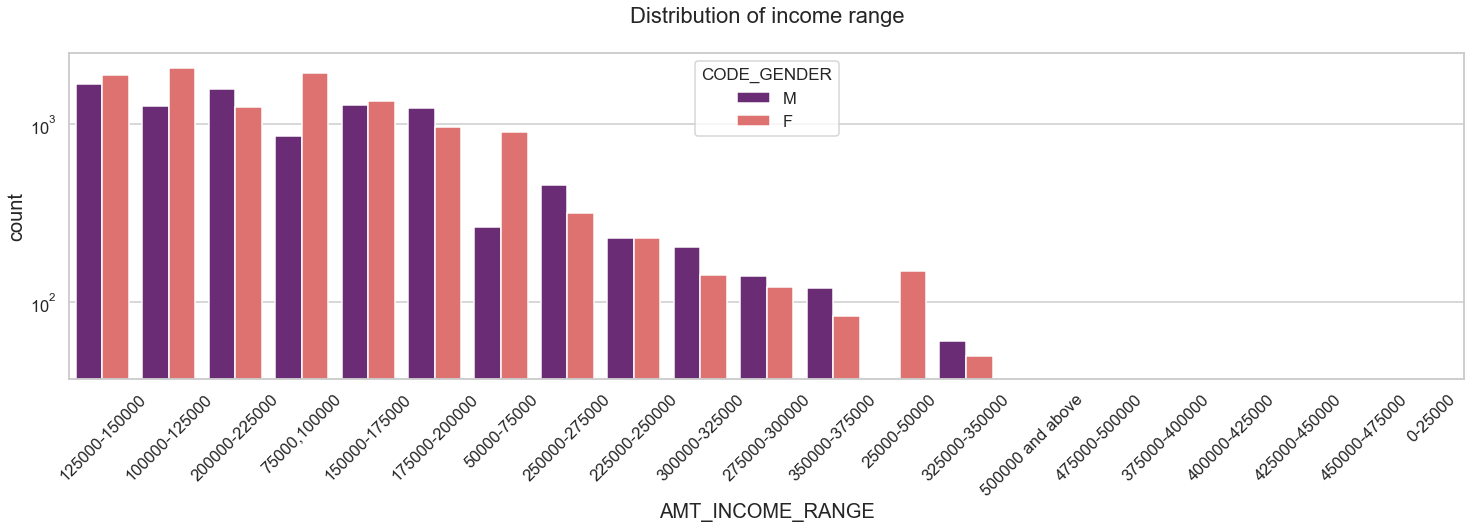

In [35]:
# PLotting for income range -- Target 1

uniplot(target1,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

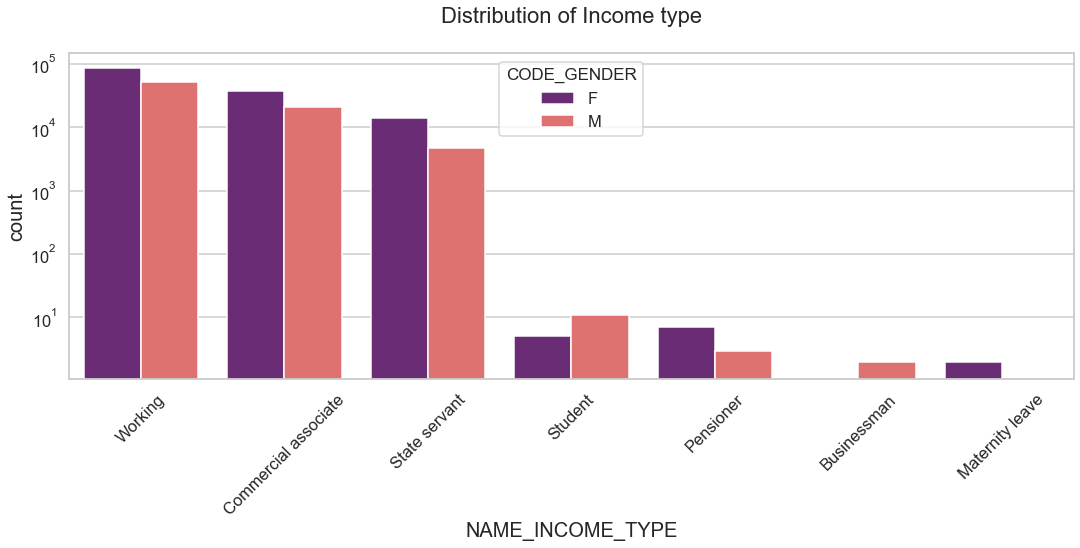

In [36]:
# Plotting for Income type -- Target 0

uniplot(target0,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

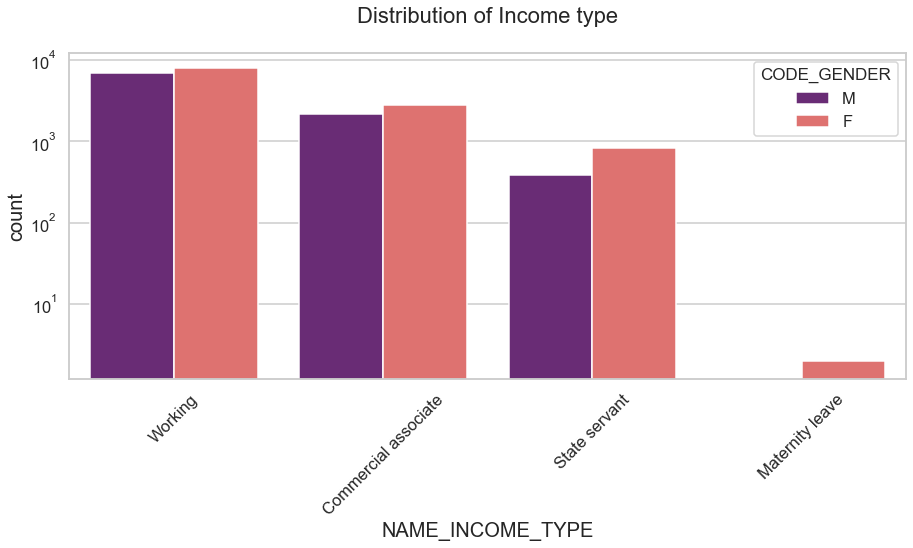

In [37]:
# Plotting for Income type -- Target 1

uniplot(target1,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

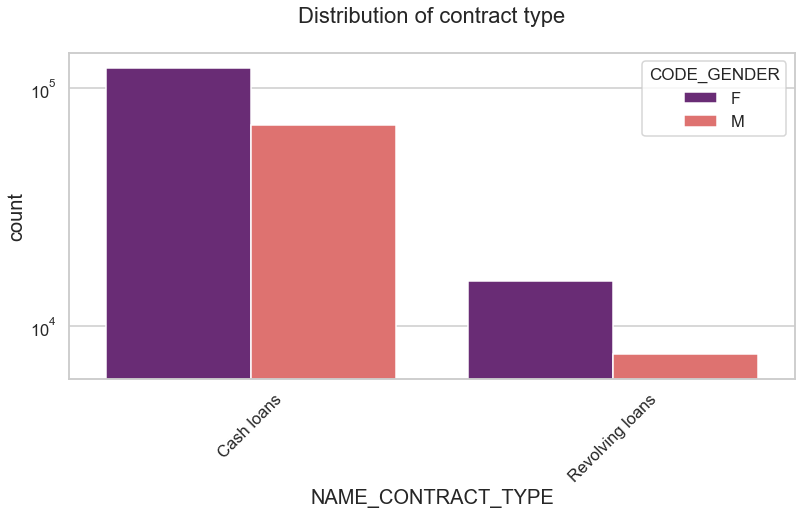

In [38]:
# Plotting for Contract type -- Target 0

uniplot(target0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.

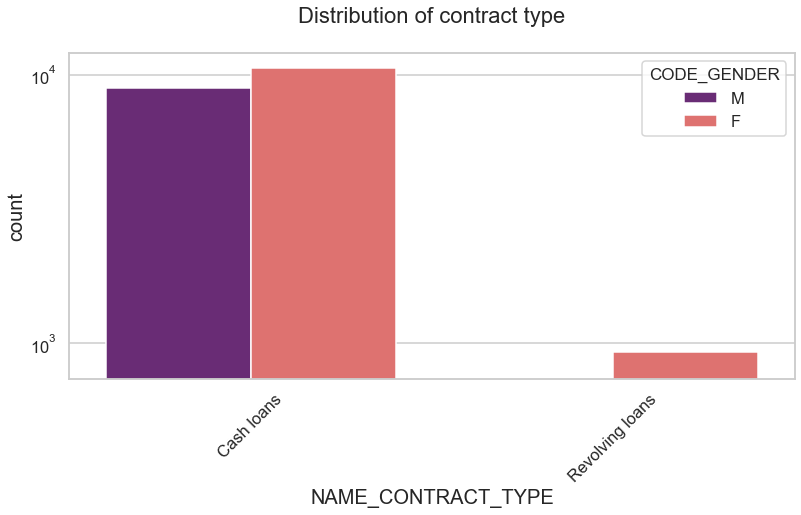

In [39]:
# Plotting for Contract type -- Target 1

uniplot(target1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

In [40]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0.iloc[0:,2:]
target1_corr=target1.iloc[0:,2:]

target0_correlation=target0_corr.corr(method='spearman')
target1_correlation=target1_corr.corr(method='spearman')

In [41]:
# Correlation for target 0
target0_correlation

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.024093,-0.022086,-0.008840,-0.028738,0.265098,0.030584,0.159223,-0.119844,-0.029640,-0.022850,-0.015217,-0.005165,0.001499,0.007534,0.013474
AMT_INCOME_TOTAL,-0.024093,1.000000,0.351004,0.418240,0.085068,-0.041981,-0.051560,0.034656,-0.034283,0.064772,0.071199,0.149010,0.137947,0.003719,-0.002416,0.003690
AMT_CREDIT,-0.022086,0.351004,1.000000,0.812205,0.039853,-0.164916,-0.098236,-0.021748,-0.036187,0.026446,0.004936,0.024850,0.030106,-0.039272,-0.028640,-0.003534
AMT_ANNUITY,-0.008840,0.418240,0.812205,1.000000,0.040686,-0.091703,-0.065754,0.005058,-0.024138,0.021273,0.023321,0.054878,0.054847,-0.017148,-0.013693,0.000725
REGION_POPULATION_RELATIVE,-0.028738,0.085068,0.039853,0.040686,1.000000,-0.038896,0.000043,-0.040747,-0.010655,0.117791,-0.027683,0.017701,0.040251,-0.047422,-0.031236,-0.005253
DAYS_BIRTH,0.265098,-0.041981,-0.164916,-0.091703,-0.038896,1.000000,0.308537,0.269411,0.093365,0.053578,0.059761,0.039067,0.013738,0.169646,0.112445,0.028479
DAYS_EMPLOYED,0.030584,-0.051560,-0.098236,-0.065754,0.000043,0.308537,1.000000,0.128874,0.109304,0.027689,0.065905,0.087818,0.063877,0.119376,0.126345,0.068893
DAYS_REGISTRATION,0.159223,0.034656,-0.021748,0.005058,-0.040747,0.269411,0.128874,1.000000,0.036449,-0.029925,0.017465,0.011426,0.003870,0.039545,0.048077,0.027091
DAYS_ID_PUBLISH,-0.119844,-0.034283,-0.036187,-0.024138,-0.010655,0.093365,0.109304,0.036449,1.000000,0.009310,0.026757,0.020694,0.008814,0.055529,0.033554,0.001494
HOUR_APPR_PROCESS_START,-0.029640,0.064772,0.026446,0.021273,0.117791,0.053578,0.027689,-0.029925,0.009310,1.000000,0.049401,0.061727,0.048295,0.012634,-0.004615,-0.010184


In [42]:
# Correlation for target 1
target1_correlation

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039619,0.004980,0.018800,-0.029516,0.172944,0.004363,0.110598,-0.088867,-0.037673,-0.035047,-0.040593,-0.028066,-0.016051,-0.004671,0.010394
AMT_INCOME_TOTAL,-0.039619,1.000000,0.336137,0.399542,0.047949,-0.092956,-0.048946,0.007295,-0.049399,0.071594,0.066014,0.148961,0.142350,-0.000384,0.001524,0.009473
AMT_CREDIT,0.004980,0.336137,1.000000,0.804281,0.037232,-0.195576,-0.106016,-0.023592,-0.064056,0.019385,0.005446,0.023617,0.028561,-0.029431,-0.027239,-0.008098
AMT_ANNUITY,0.018800,0.399542,0.804281,1.000000,0.018850,-0.091496,-0.057372,0.019006,-0.042031,0.015454,0.020461,0.051526,0.053037,-0.009961,-0.009653,0.002271
REGION_POPULATION_RELATIVE,-0.029516,0.047949,0.037232,0.018850,1.000000,-0.042888,-0.014824,-0.033386,-0.017191,0.105838,-0.032702,-0.012846,0.007016,-0.057919,-0.044679,-0.015623
DAYS_BIRTH,0.172944,-0.092956,-0.195576,-0.091496,-0.042888,1.000000,0.256027,0.193653,0.152088,0.044783,0.050523,0.022410,-0.001068,0.146481,0.095408,0.007702
DAYS_EMPLOYED,0.004363,-0.048946,-0.106016,-0.057372,-0.014824,0.256027,1.000000,0.087100,0.106854,0.009608,0.067470,0.082009,0.056532,0.118055,0.139102,0.068360
DAYS_REGISTRATION,0.110598,0.007295,-0.023592,0.019006,-0.033386,0.193653,0.087100,1.000000,0.061150,-0.046045,0.007579,0.001064,-0.000818,0.017518,0.038154,0.023656
DAYS_ID_PUBLISH,-0.088867,-0.049399,-0.064056,-0.042031,-0.017191,0.152088,0.106854,0.061150,1.000000,0.013147,0.020068,0.007537,-0.001913,0.047870,0.015291,-0.015793
HOUR_APPR_PROCESS_START,-0.037673,0.071594,0.019385,0.015454,0.105838,0.044783,0.009608,-0.046045,0.013147,1.000000,0.047865,0.060972,0.049592,0.003031,0.004794,0.002975


In [43]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

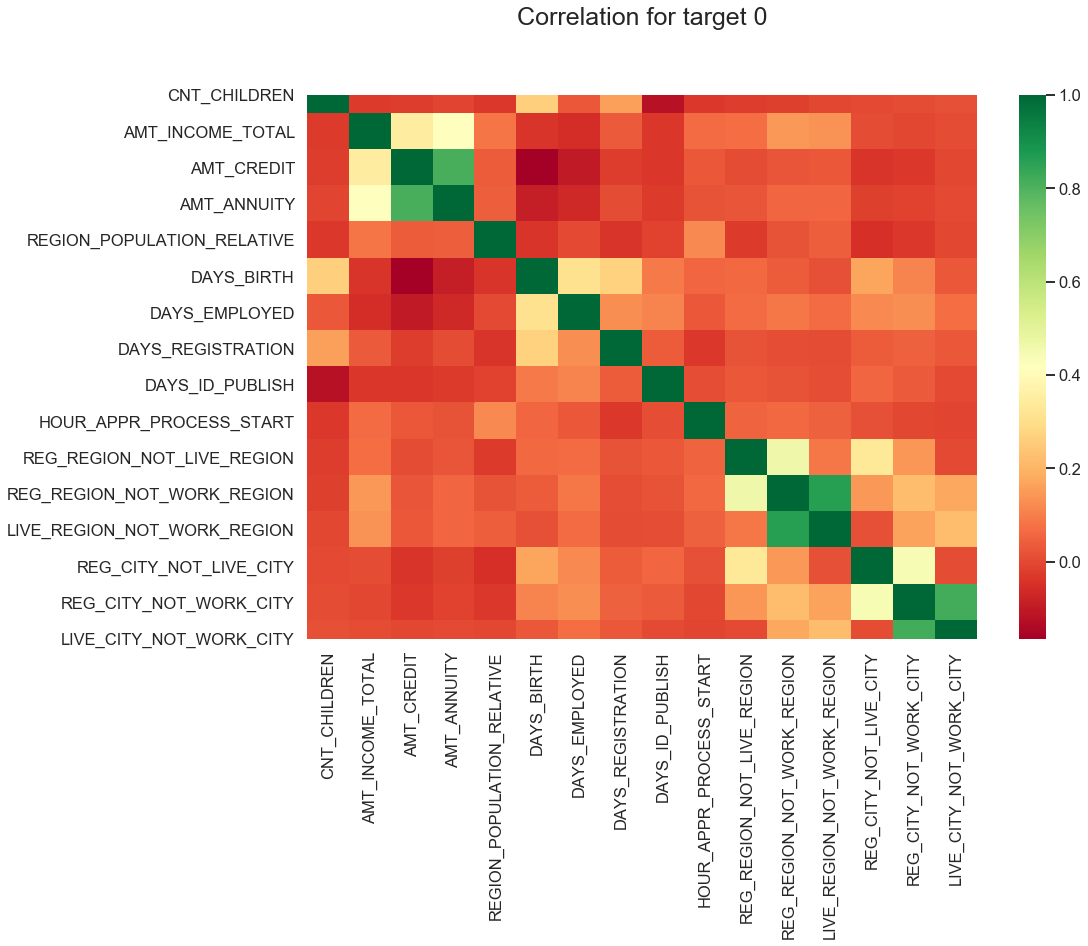

In [44]:

# For Target 0

targets_corr(data=target0_correlation,title='Correlation for target 0')

As we can see from above correlation heatmap, There are number of observation we can point out

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. Less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

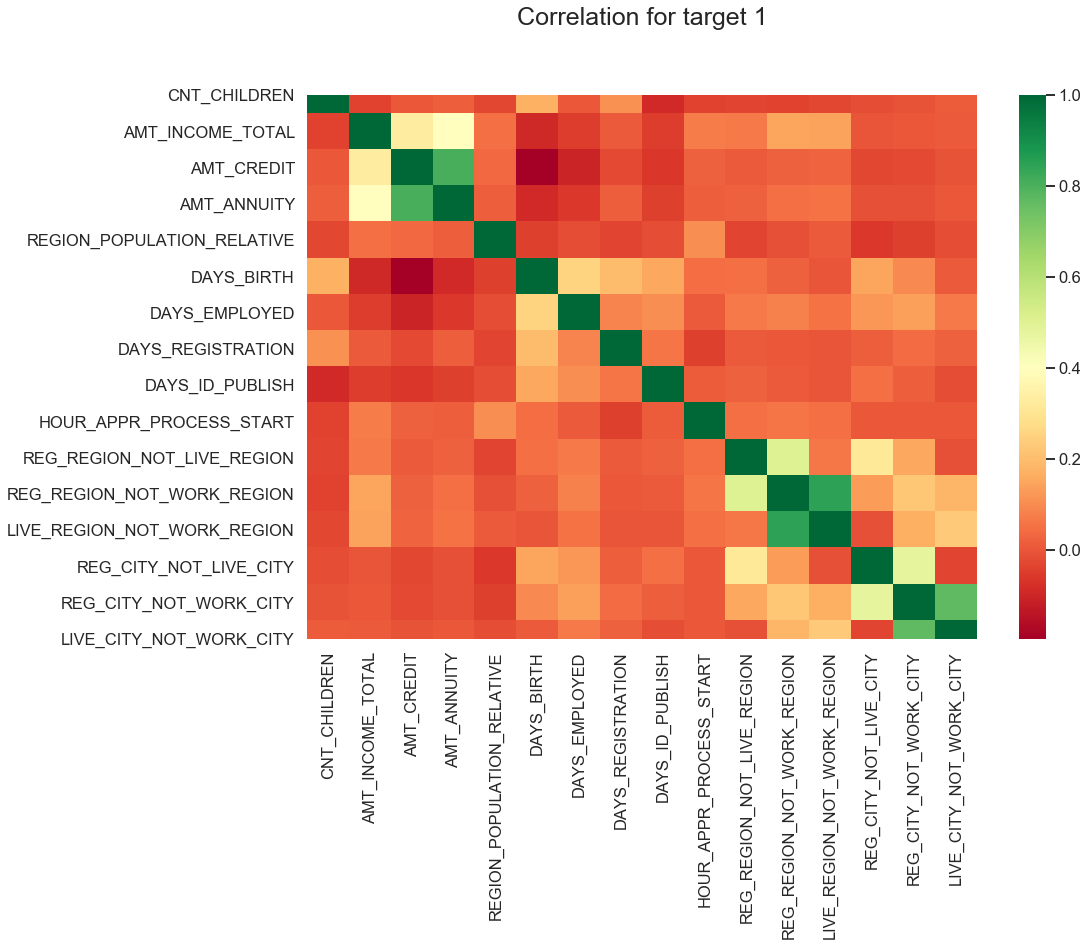

In [45]:
# For Target 1

targets_corr(data=target1_correlation,title='Correlation for target 1')

This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

1. The client's permanent address does not match contact address are having less children and vice-versa
2. The client's permanent address does not match work address are having less children and vice-versa

## Bivariate analysis for numerical variables

### For Target 0

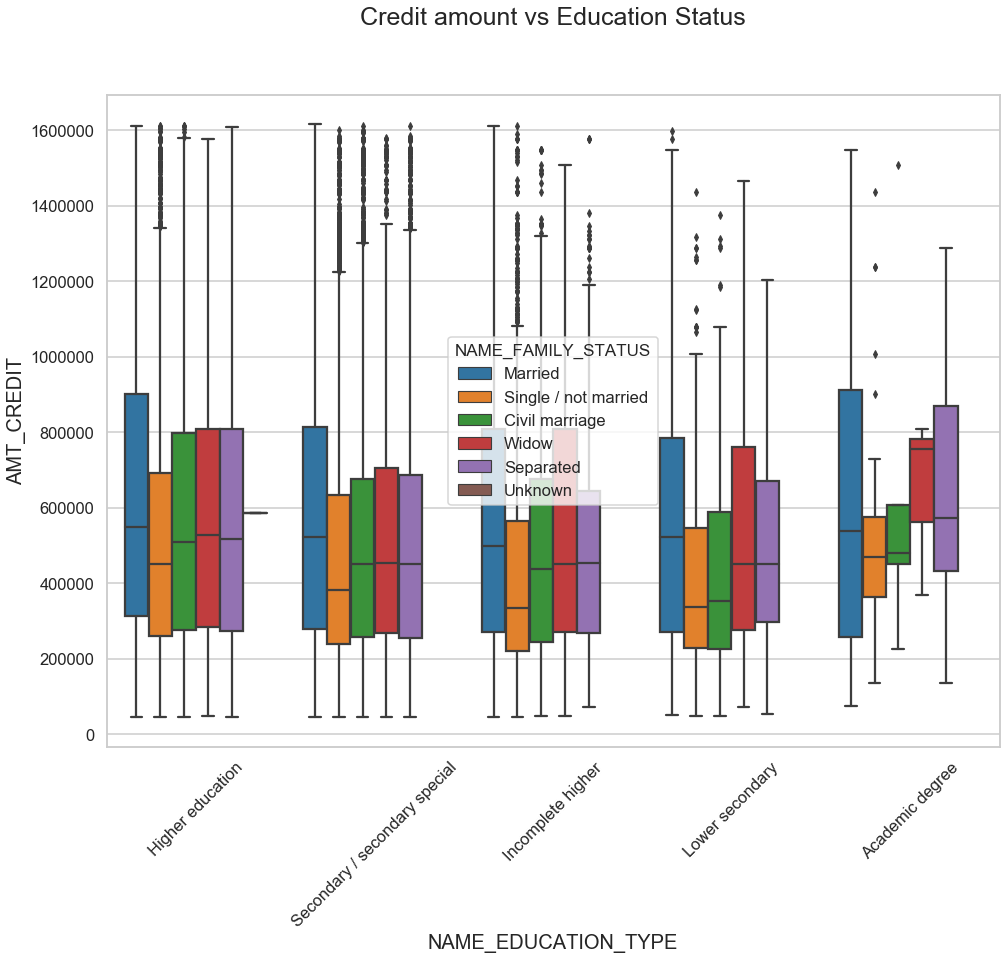

In [46]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()


From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

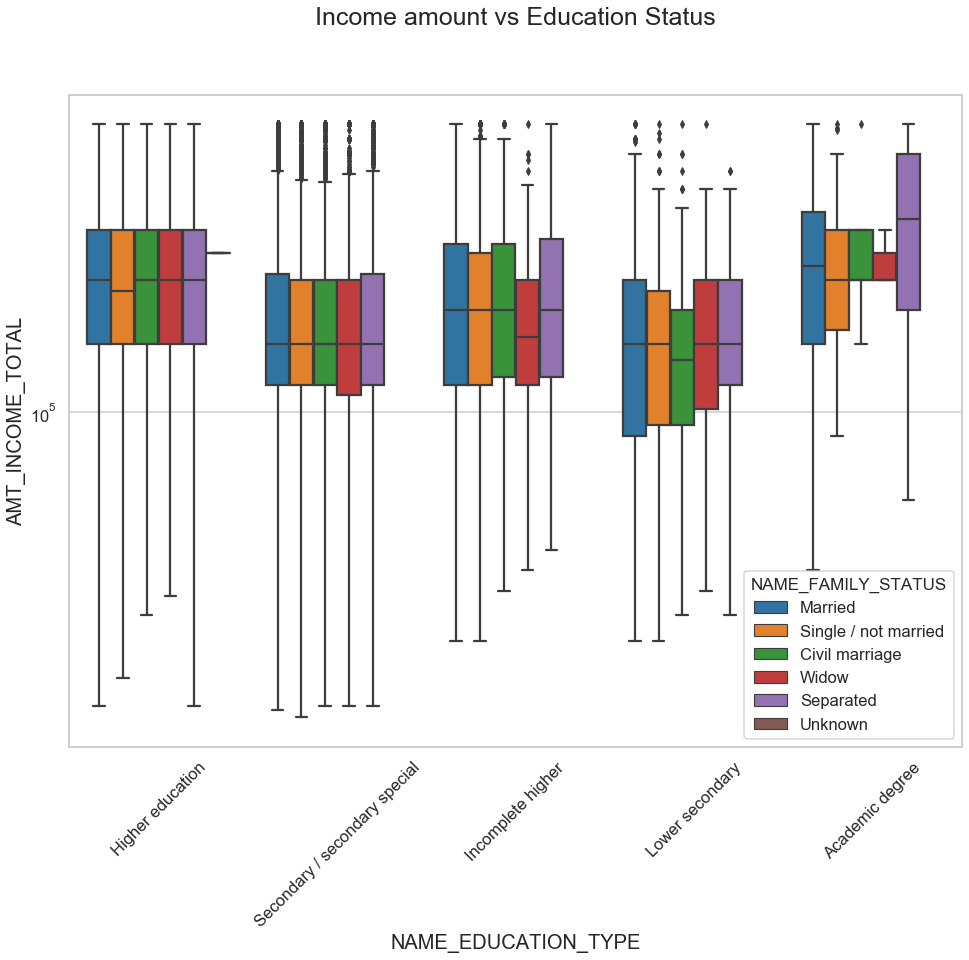

In [47]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.

### For Target 1

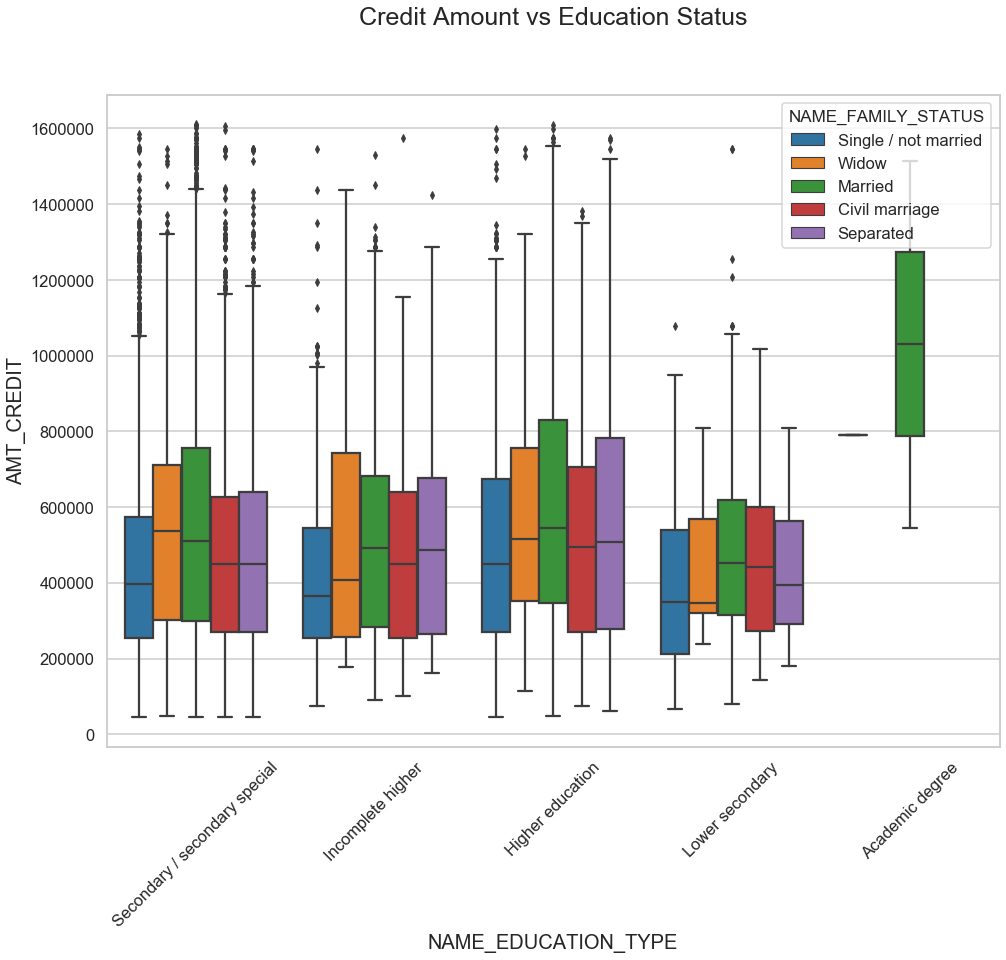

In [48]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Quite similar with Target 0 From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

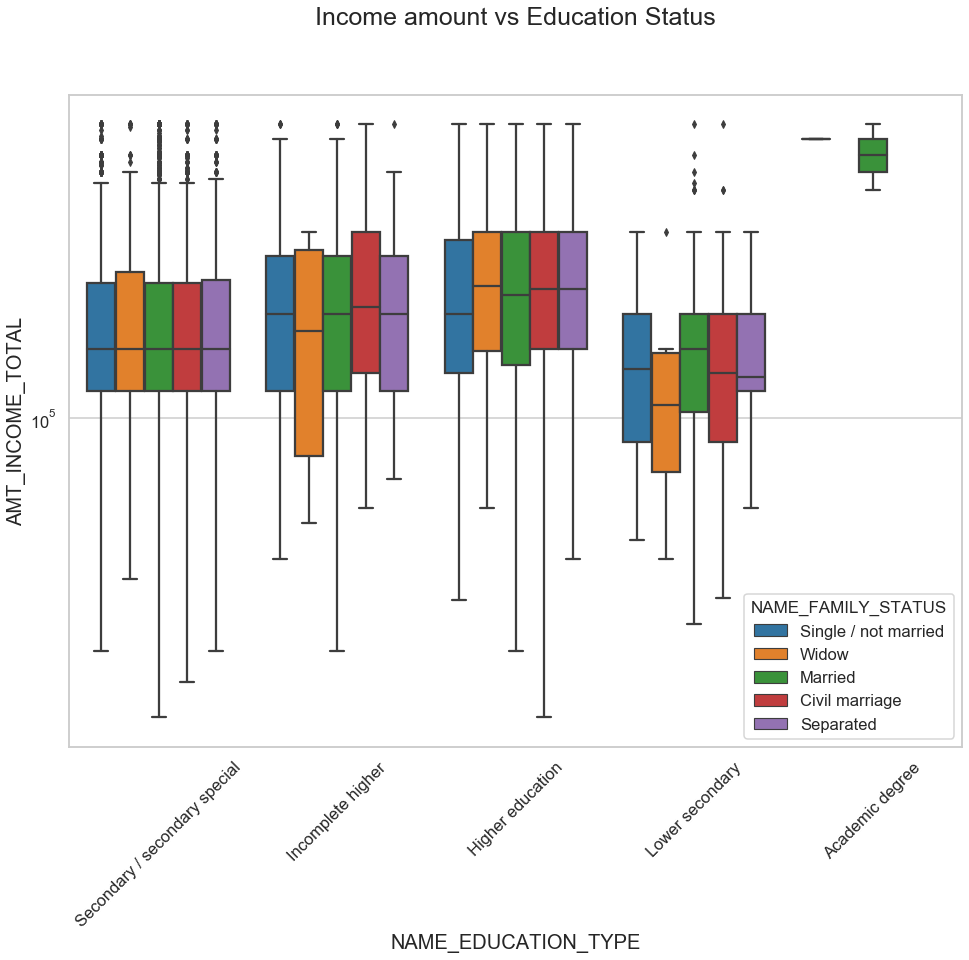

In [49]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Have some similarity with Target0, From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others.

## Previous Application Data Merging

In [50]:
previous_applications.dropna(thresh=previous_applications.shape[0]*0.6,how='all',axis=1,inplace=True)
previous_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_CLI

In [51]:
# Removing the column values of 'XNA' and 'XAP'

previous_applications=previous_applications.drop(previous_applications[previous_applications['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_applications=previous_applications.drop(previous_applications[previous_applications['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_applications=previous_applications.drop(previous_applications[previous_applications['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)


In [52]:
# Now merging the Application dataset with previous appliaction dataset

merged_df = pd.merge(left=applications,right=previous_applications,how='inner',on='SK_ID_CURR')

In [53]:
# Renaming the column names after merging
merged_df = merged_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDIT_x':'AMT_CREDIT_PREV','AMT_ANNUITY_x':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_START_x':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_START_x':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
merged_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_PREV,AMT_ANNUITY_PREV,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,48165.000000,48165.000000,48165.000000,48165.000000,4.816500e+04,48165.000000,48165.000000,48165.000000,48165.000000,48165.000000,...,4.816500e+04,47972.000000,4.816500e+04,4.816500e+04,4.816500e+04,48165.000000,48165.000000,48165.000000,48165.000000,47972.000000
mean,278425.439718,0.138171,0.469594,171205.310969,5.275400e+05,25697.919745,0.020484,-15016.939500,-2273.410256,-4410.008576,...,1.935573e+06,25326.327823,4.480506e+05,5.059057e+05,4.480506e+05,12.223150,0.999128,-615.122516,9.881574,30.022993
std,103242.138310,0.345083,0.756374,68153.569963,3.198911e+05,11407.345645,0.012679,3621.504143,2240.083895,3264.839385,...,5.299143e+05,16111.114241,4.756523e+05,5.208926e+05,4.756523e+05,3.226454,0.029517,510.016868,141.014771,17.783328
min,100034.000000,0.000000,0.000000,27000.000000,4.500000e+04,2052.000000,0.000533,-25153.000000,-17170.000000,-19488.000000,...,1.000125e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-2406.000000,-1.000000,6.000000
25%,189017.000000,0.000000,0.000000,117000.000000,2.700000e+05,16956.000000,0.010147,-17849.000000,-2980.000000,-6586.000000,...,1.481782e+06,13738.545000,1.350000e+05,1.570995e+05,1.350000e+05,10.000000,1.000000,-674.000000,-1.000000,12.000000
50%,280024.000000,0.000000,0.000000,157500.000000,4.545000e+05,24691.500000,0.018850,-14726.000000,-1564.000000,-3998.000000,...,1.941579e+06,21491.100000,2.700000e+05,3.138390e+05,2.700000e+05,12.000000,1.000000,-483.000000,-1.000000,24.000000
75%,368497.000000,0.000000,1.000000,216000.000000,6.897420e+05,32656.500000,0.026392,-11928.000000,-790.000000,-1574.000000,...,2.390322e+06,32531.490000,5.850000e+05,6.750000e+05,5.850000e+05,15.000000,1.000000,-301.000000,0.000000,48.000000
max,456255.000000,1.000000,10.000000,360000.000000,1.611072e+06,59629.500000,0.072508,-7722.000000,-5.000000,0.000000,...,2.845265e+06,418058.145000,4.050000e+06,4.104351e+06,4.050000e+06,23.000000,1.000000,-2.000000,12102.000000,60.000000


In [54]:
# Removing unwanted columns for analysis
merged_df.drop(['SK_ID_CURR','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_LAST_APPL_PER_CONTRACT',
              'NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [55]:
#defining a function calculate correlations betwen contracts 

def plot_p_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = merged_df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

# Calculate the percentage of target=1 per category value
    cat_perc = merged_df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

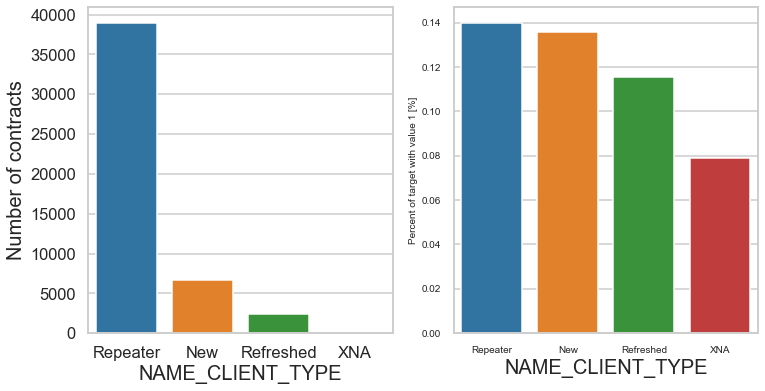

In [56]:
plot_p_stats('NAME_CLIENT_TYPE')

We can see that repeated customers are also not repaying the loans

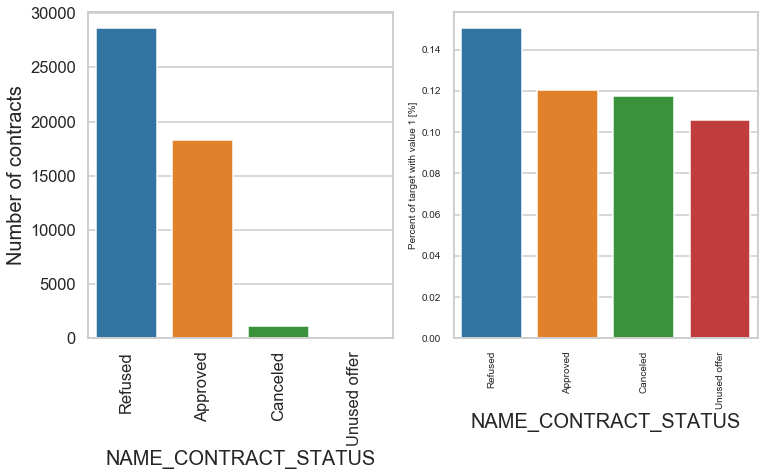

In [57]:
plot_p_stats('NAME_CONTRACT_STATUS', True, True)

As it has to be , the percentage of refused is more for the category 1 but still the poople who didnt pay for after the approval is also more than 60% .

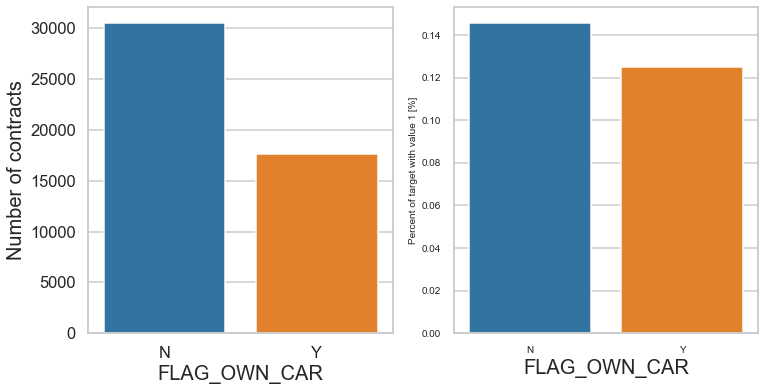

In [58]:
plot_p_stats('FLAG_OWN_CAR')

 
The clients that owns a car are almost a half of the ones that doesn't own one. The clients thatowns a car are less likely to not repay a car that the ones that own.
Both categories have not-repayment rates around 8%.

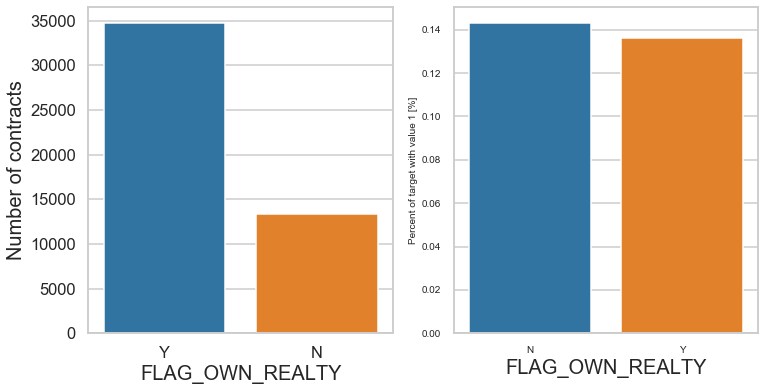

In [59]:
plot_p_stats('FLAG_OWN_REALTY')

The clients that owns real estate are more than double of the ones that doesn't own. Both categories (owning real estate or not owning) have non-repayment rates near to 8%

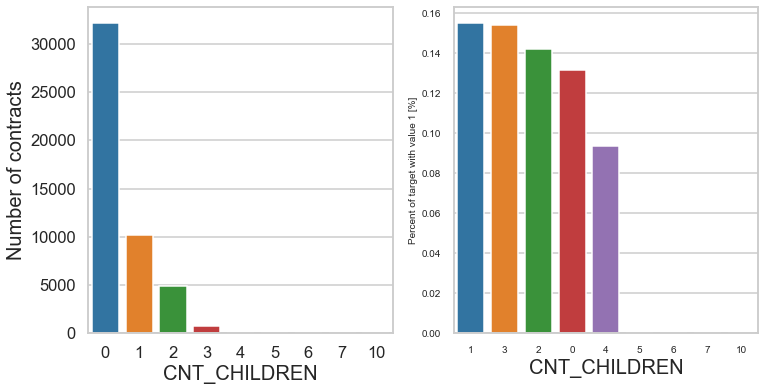

In [60]:
plot_p_stats('CNT_CHILDREN')

We can see that irrespective of 1,2,3,or 5 childeren the % of non payment is close but there is a difference for people with 6 and 4 kids

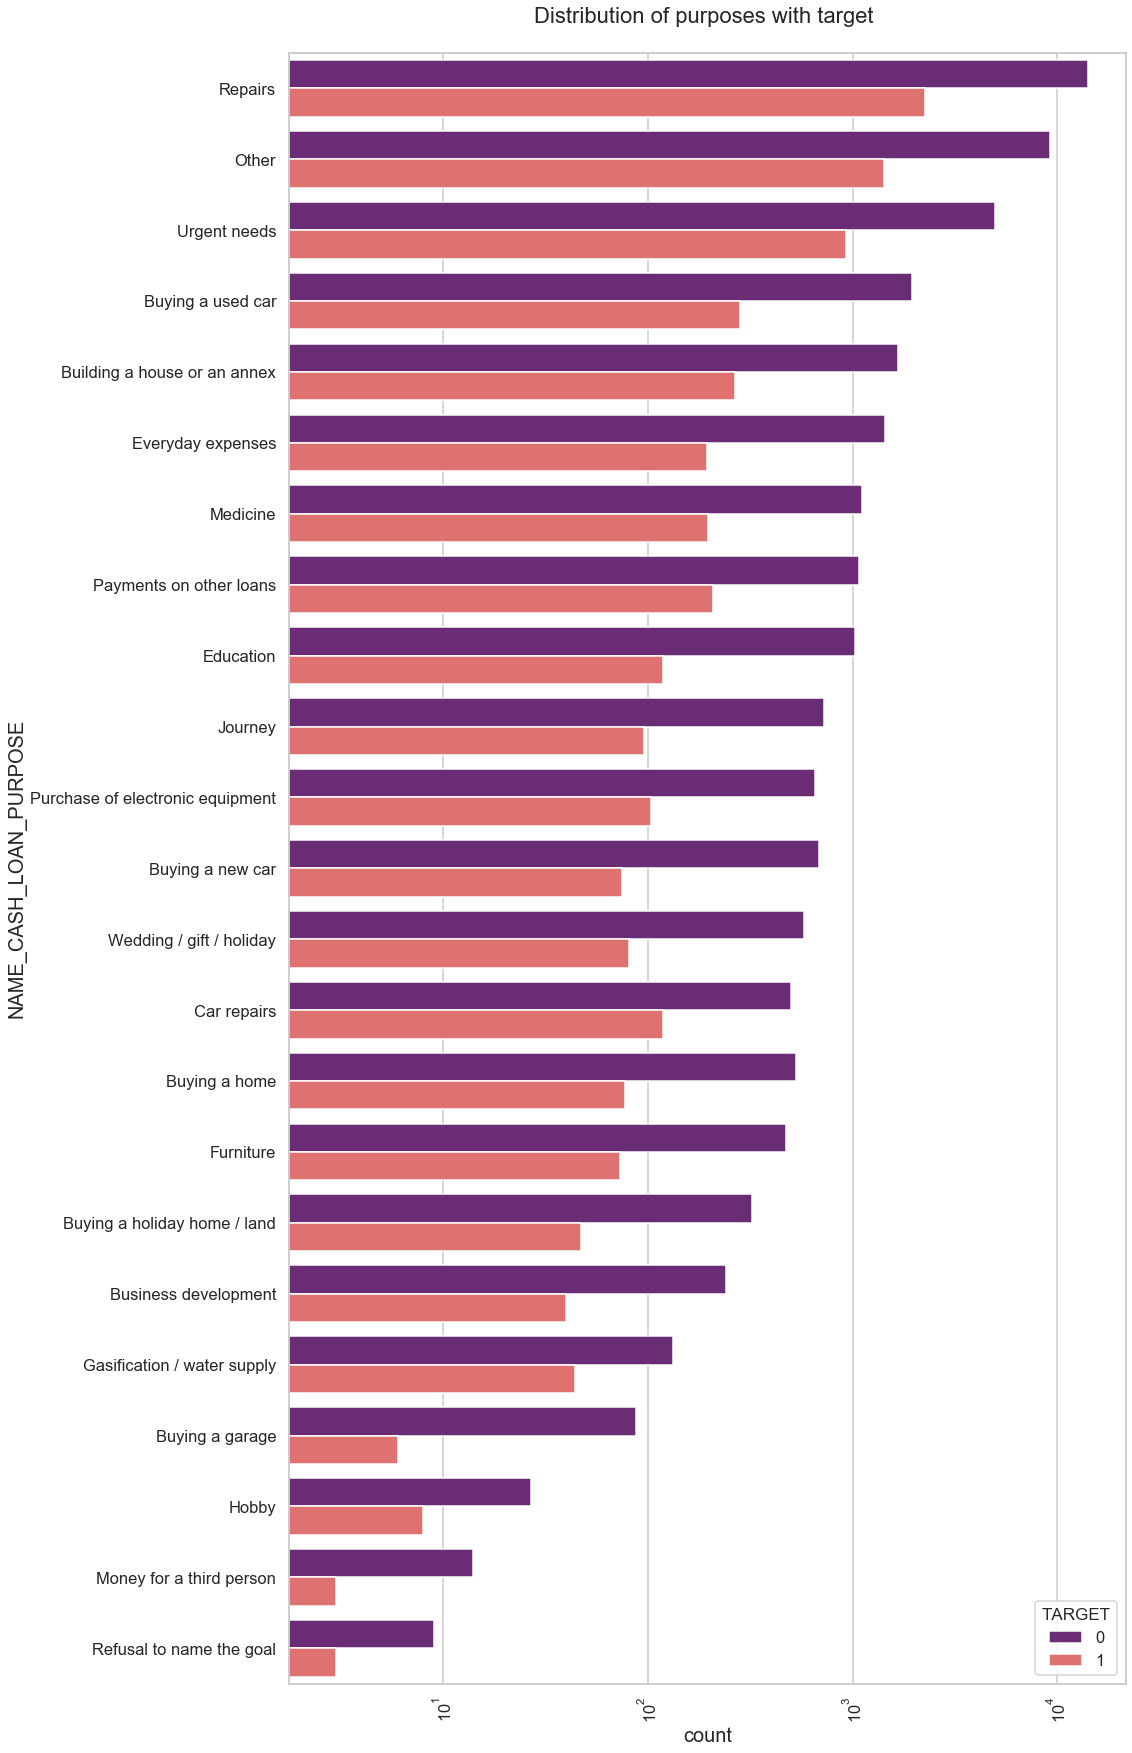

In [61]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = merged_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

Few points we can conclude from abpve plot:

1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage',     'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

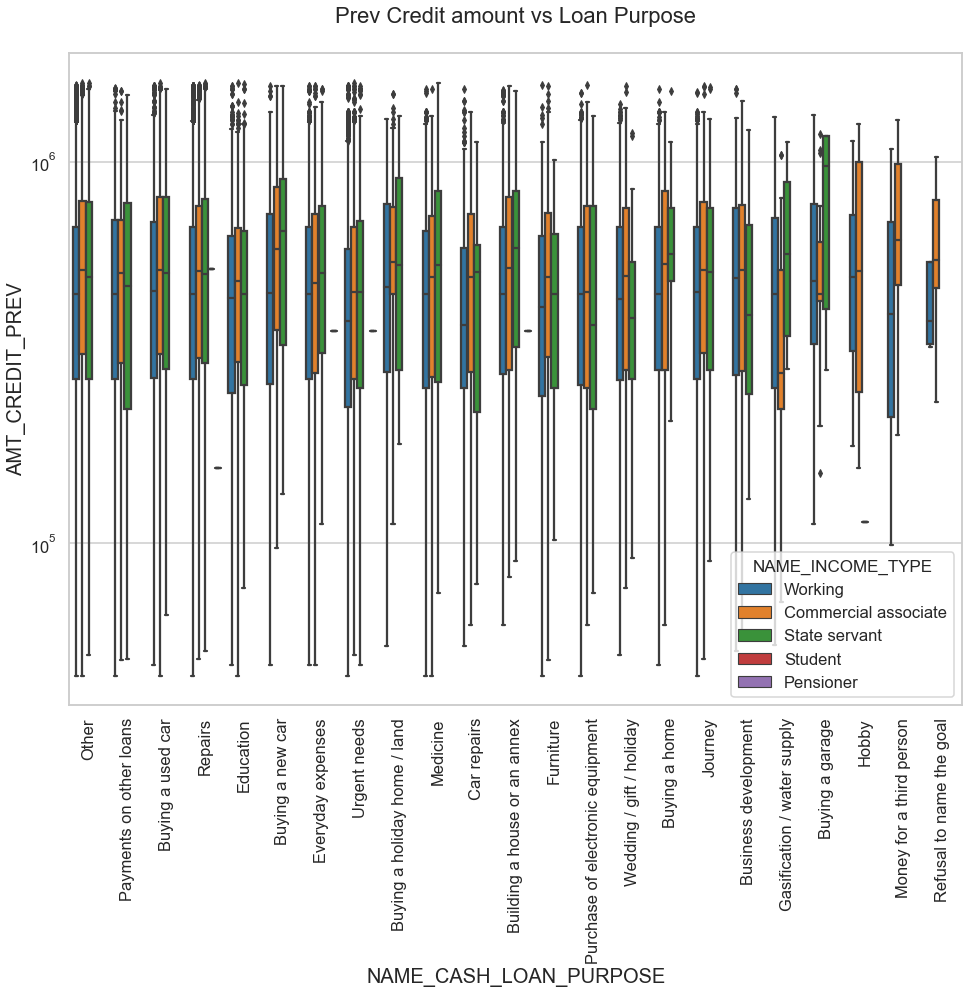

In [62]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =merged_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

### From the above we can conclude some points-

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

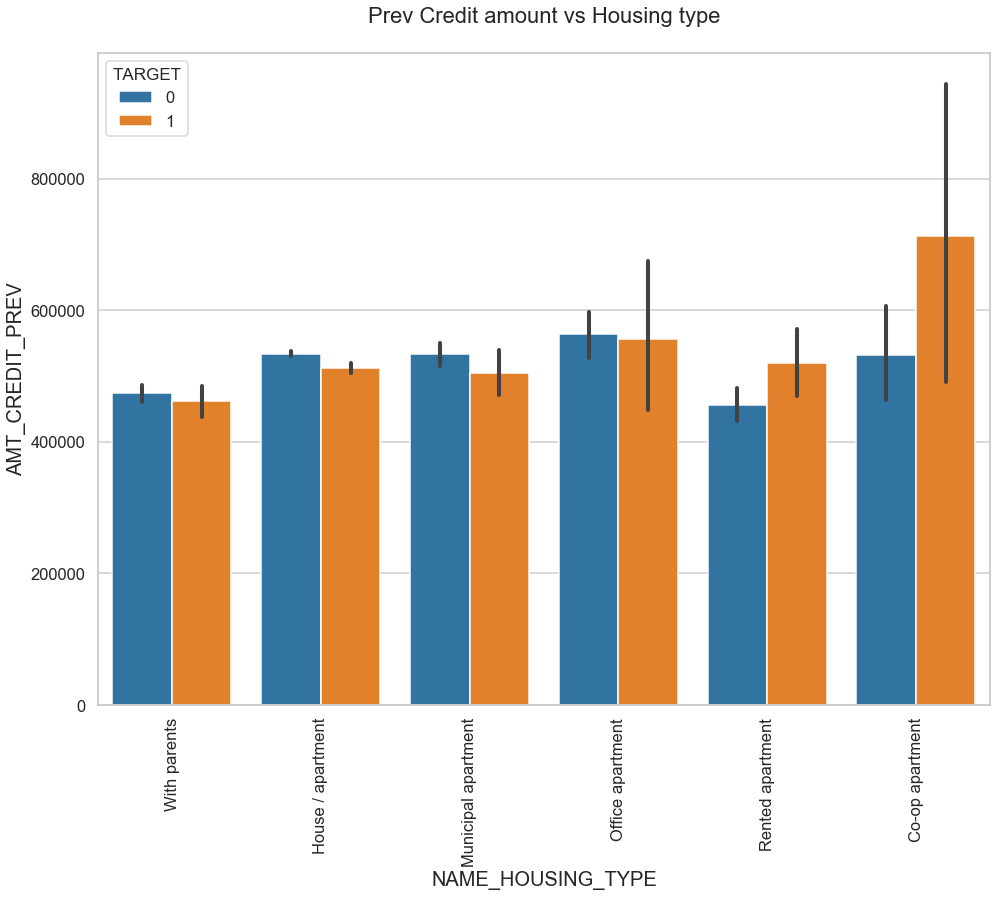

In [63]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =merged_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

## CONCLUSION
1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.